### Benchmark of the solver: 

Analytical vs. numerical solutions (partical velocity and strain waveforms) in a homogeneous model due to explosive source.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append('../src')
from elasticSolver import elasticSolver
from analyticalSolution import AnalyticalSolution


## Python 2D Elastic Solver

In [2]:
# Grid properties
nx, nz = 401, 301        # number of grid points in x and y direction
dx, dz = 10.0, 10.0      # grid spacing in x and y direction
ndamp  = 40              # Damping profile

# Medium properties
vp = np.ones((nx, nz)) * 4000.   # P-wave velocity
vs = vp/np.sqrt(3)               # S-wave velocity
rho = np.ones((nx, nz)) * 2500.0 # density

# Time properties
dt = 0.001               # time step
nt = 1001                # number of time steps

# Source and Receiver properties
f0 = 10.0                # dominant frequency of the source
src_num = 1
das_num = 1
geo_num = 1
 
src_coord = np.array([np.array([200 * dx, 150 * dx])                for i in range(src_num)])
das_coord = np.array([np.array([dx * 10 * (i+5), dx *  5 * (i+20)]) for i in range(das_num)])
geo_coord = np.array([np.array([dx * 10 * (i+5), dx *  5 * (i+20)]) for i in range(das_num)])
das_sensitivity = np.zeros((das_num, 6))

x = np.arange(0, nx * dx, dx)
z = np.arange(0, nz * dz, dz)

source    : nx = 200 - 200, nz = 150 - 150
DAS cable : nx = 50 - 50, nz = 100 - 100
Geophone  : nx = 50 - 50, nz = 100 - 100


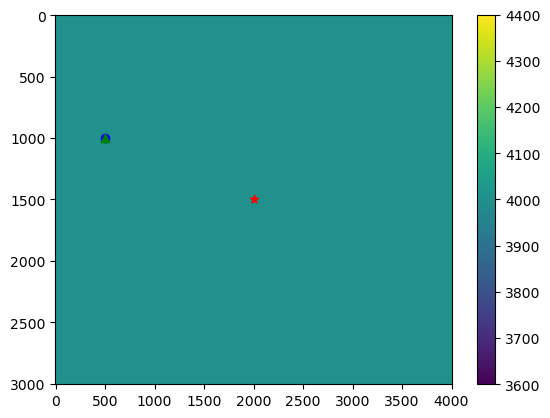

In [3]:
# set the source and receiver coordinates
src_grid = np.array([np.round(src_coord[:, 0]/dx).astype(int), np.round(src_coord[:, 1]/dz).astype(int)])
das_grid = np.array([np.round(das_coord[:, 0]/dx).astype(int), np.round(das_coord[:, 1]/dz).astype(int)])
geo_grid = np.array([np.round(geo_coord[:, 0]/dx).astype(int), np.round(geo_coord[:, 1]/dz).astype(int)])

print('source    : nx = %d - %d, nz = %d - %d'%(src_grid[0,:].min(), src_grid[0,:].max(), src_grid[1,:].min(), src_grid[1,:].max()))
print('DAS cable : nx = %d - %d, nz = %d - %d'%(das_grid[0,:].min(), das_grid[0,:].max(), das_grid[1,:].min(), das_grid[1,:].max()))
print('Geophone  : nx = %d - %d, nz = %d - %d'%(geo_grid[0,:].min(), geo_grid[0,:].max(), geo_grid[1,:].min(), geo_grid[1,:].max()))

plt.pcolor(x, z, vp.T)
plt.colorbar()
plt.scatter(src_coord[:,0], src_coord[:,1], color='r', marker = '*')
plt.scatter(das_coord[:,0], das_coord[:,1], color='b', marker = 'o')
plt.scatter(geo_coord[:,0], geo_coord[:,1], color='g', marker = '^')
plt.gca().invert_yaxis()
plt.show()

# set solver
obsSolver = elasticSolver(nx, nz, ndamp, dx, dz, dt, nt, f0, vp, vs, rho, src_coord, das_coord, geo_coord, das_sensitivity)

In [7]:
solus = obsSolver.forward(save_wavefield = False)

## 2D Analytical Solution

In [8]:
igeo = 0
isrc = 0
x = abs(geo_coord[igeo,0] - src_coord[isrc, 0])    # x receiver coordinate 
z = abs(geo_coord[igeo,1] - src_coord[isrc, 1])    # z receiver coodinate
y = 0                                              # y receiver coodinate

vp_ana  = 4000                            # p-wave velocity
vs_ana  = vp_ana/np.sqrt(3)               # S-wave velocity
rho_ana = np.power(vp_ana, 0.25) * 310    # Density kg/m^3

M = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]) # Moment tensor
f0   = 10.0               # Dominant frequency (Hz)
M0   = 1*1e16             # Scalar Moment 
tmin = 0.0                # Minimum observation time (s)
tmax = 1.0                # Maximum observation time (s)
dt   = 0.001              # Time interval (s)

In [9]:
# this block will take a while to run
# calculate the analytical solution for velocity and displacement, but to compare with the numerical solution, I use velocity component
V2D = AnalyticalSolution(vp_ana, vs_ana, rho_ana, x, y, z, tmin, tmax, dt, f0, M0, M, dim='2D', comp = 'displacement', verbose = False)

Calculating 2D solution by integrating 3D solution from 1040 receivers ...


100%|██████████| 1040/1040 [09:27<00:00,  1.83it/s]


In [10]:
# this block will take a while to run
# calculate the analytical solution for strain
S2D = AnalyticalSolution(vp_ana, vs_ana, rho_ana, x, y, z, tmin, tmax, dt, f0, M0, M, dim='2D', comp = 'strain', verbose = False)

Calculating 2D solution by integrating 3D solution from 1040 receivers ...


100%|██████████| 1040/1040 [08:12<00:00,  2.11it/s]


Calculating 2D solution by integrating 3D solution from 1040 receivers ...


100%|██████████| 1040/1040 [08:14<00:00,  2.10it/s]


Calculating 2D solution by integrating 3D solution from 1040 receivers ...


100%|██████████| 1040/1040 [08:15<00:00,  2.10it/s]


Calculating 2D solution by integrating 3D solution from 1040 receivers ...


100%|██████████| 1040/1040 [08:30<00:00,  2.04it/s]


## FD2D Elastic Solver

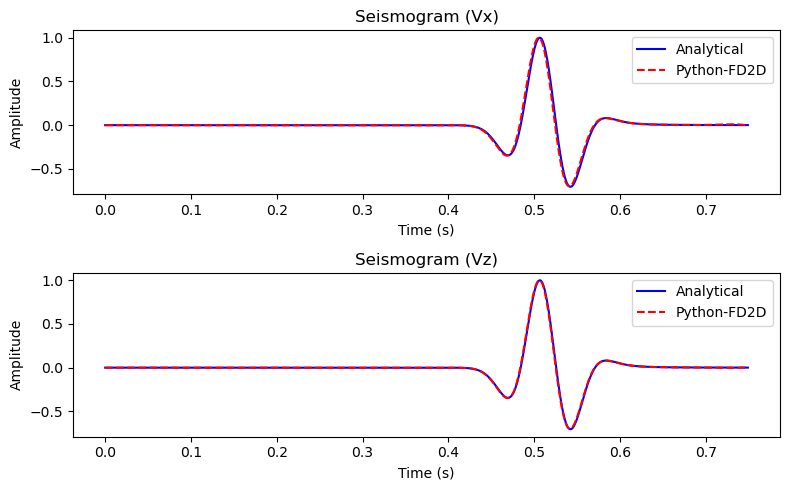

In [11]:
## Time
t = solus[0]['t'][:750]

## Python Elastic Solver
pyVx  = solus[0]['vx'][igeo,:750]
pyVz  = solus[0]['vz'][igeo,:750]

## Analytical solution
anVx  = V2D['Ux'][:750]
anVz  = V2D['Uz'][:750]

# Plot the results
plt.figure(figsize=(8, 5))

plt.subplot(211)
plt.plot(     t,  anVx / np.max(abs(anVx)), 'b-',    label='Analytical')
plt.plot(     t,  pyVx / np.max(abs(pyVx)), 'r--',   label='Python-FD2D')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Seismogram (Vx)')
plt.legend()

plt.subplot(212)
plt.plot(     t,  anVz / np.max(abs(anVz)), 'b-',    label='Analytical')
plt.plot(     t,  pyVz / np.max(abs(pyVz)), 'r--',   label='Python-FD2D')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Seismogram (Vz)')
plt.legend()
plt.tight_layout()

# plt.savefig('Figure-2D-Velocity.png', dpi=300)

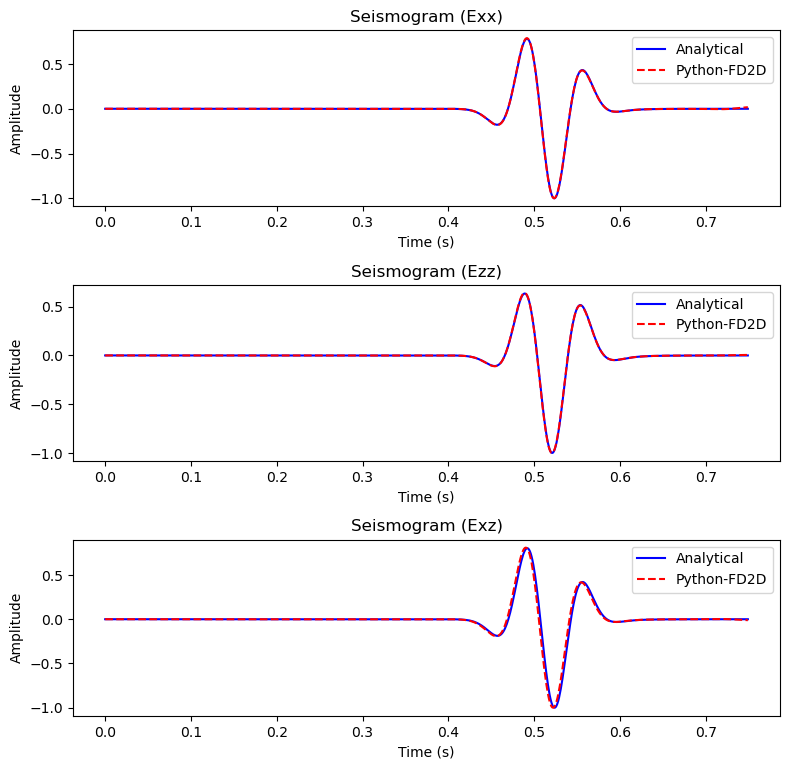

In [12]:
# Plot the results
plt.figure(figsize=(8, 15))

t = solus[0]['t'][:750]

comps = ['Exx', 'Ezz', 'Exz']
for i in range(3):
    
    comp = comps[i]

    ## Analytical solution for strain
    an = -S2D[comp][:750]  # Note that I multiply by -1, possibly due to the coordinate system definition problem

    ## Python Elastic Solver
    py  = solus[0][comp.lower()][igeo,:750]
    
    plt.subplot(6, 1, i+1)
    plt.plot(     t,  an / np.max(abs(an)), 'b-',  label = 'Analytical')
    plt.plot(     t,  py / np.max(abs(py)), 'r--', label = 'Python-FD2D')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Seismogram ({comp})')
    plt.legend(loc='best')
    
plt.tight_layout()

# plt.savefig('Figure-2D-Strain.png', dpi=300)